Assignment 2 - Air Pollution
Air Pollution is Rising!
Predicting Pollution Levels using Machine Learning
It is winter time in Delhi so Cody decided to go for a walk to the news stand and on reachingwas surprised to see the air quality index of Delhi in the newspaper . So he decided to collectthe air samples of different locations and then took these samples to his lab where he extractedfive features of the air he collected which can be used to predict the air quality index andcombined it with the air quality index given in the newspapers. You are provided with the datacollected by Cody and your job is to design a machine learning model which given the featuresextracted by Cody can predict air quality.

Data consist of three csv files :-1.Train.csv2.Test.csv

Train:-​ The train data consists of five feature columns and one target column. All the featurecolumns are numeric and target value is also numeric.

Test:-​ Test data consist all the columns contained by train with the exception of target columnwhich u have to predict using the model trained on train data.

Please find the attached training and testing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Training_Data/Train.csv')
print(df.head())

xdata = df.loc[:, ['feature_1','feature_2','feature_3','feature_4','feature_5']]
ydata = df.loc[:, ['target']]


x = xdata.values
y =ydata.values
print(x.shape)
print(y.shape)

X=x
Y=y

print(x[0])
itr =100
ler = 0.01

   feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662 -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997 -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364  77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168  -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077 -37.596722
(1600, 5)
(1600, 1)
[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]


In [2]:
def hypothesis(x,theta):
      return theta[0]*x[0] + theta[1]*x[1] + theta[2]*x[2] + theta[3]*x[3] + theta[4]*x[4] + theta[5]


def error(X,Y,theta):
    error = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((6,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[5] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i][1]
        grad[2] += (hx-Y[i])*X[i][2]
        grad[3] += (hx-Y[i])*X[i][3]
        grad[4] += (hx-Y[i])*X[i][4]
        grad[0] += (hx-Y[i])*X[i][0]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([5.0,2.0,3.0,4.0,5.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))
        theta[5] = theta[5] - learning_rate*grad[5]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta[2] = theta[2] - learning_rate*grad[2]
        theta[3] = theta[3] - learning_rate*grad[3]
        theta[4] = theta[4] - learning_rate*grad[4]
        theta[0] = theta[0] - learning_rate*grad[0]

        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [3]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

In [4]:
testingdata = pd.read_csv('./Testing_Data/Test.csv')
test = testingdata.values

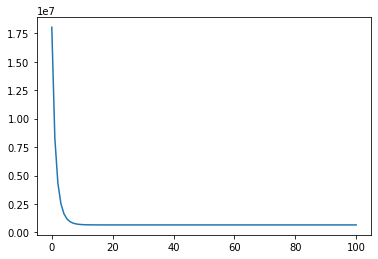

In [5]:
plt.plot(error_list)
plt.show()

In [6]:
print(final_theta)

[29.68187118 92.6624776   8.28062089 44.76773522  2.51916121  4.99096674]
